In [1]:
import yfinance as yahooFinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="darkgrid")
pd.set_option('display.max_rows', None)

In [2]:
def calculate_pct_diff(row):
    pct_diff = []
    for i in range(len(row) - 1):
        # Check for non-missing values and non-zero denominator
        if pd.notna(row.iloc[i+1]) and pd.notna(row.iloc[i]) and row.iloc[i+1] != 0:
            diff = ((row.iloc[i] - row.iloc[i+1]) / row.iloc[i+1]) * 100
            pct_diff.append(diff)
        else:
            pct_diff.append(np.nan)  # Append NaN if denominator is zero or values are missing
    return pct_diff

In [3]:
ticker = "BMW.DE"

 # 1. Stock Information

In [4]:
stock = yahooFinance.Ticker(ticker)

In [5]:
stock_info = stock.info
stock_info

{'address1': 'Petuelring 130',
 'city': 'Munich',
 'zip': '80809',
 'country': 'Germany',
 'phone': '49 89 382 0',
 'fax': '49 89 382 70 25858',
 'website': 'https://www.bmwgroup.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Bayerische Motoren Werke Aktiengesellschaft develops, manufactures, and sells automobiles and motorcycles, spare parts, and accessories worldwide. It operates through Automotive, Motorcycles, and Financial Services segments. The company offers automobiles under the BMW, MINI, and Rolls-Royce brands. It also develops, manufactures, and sells motorcycles for private use and special-purpose vehicles for operational use under the BMW Motorrad brand. In addition, the company provides car rentals; credit financing; leasing that include insurance and service products; financi

In [6]:
market_cap = stock_info['marketCap']
market_cap

43859365888

In [7]:
exchange = stock_info['exchange']
exchange

'GER'

In [8]:
averageVolume = stock_info['averageVolume']
averageVolume

1494647

In [9]:
averageVolume10days = stock_info['averageVolume10days']
averageVolume10days

2371035

In [10]:
currentPrice = stock_info['currentPrice']
currentPrice

70.86

In [11]:
fiftyDayAverage_stockPrice = stock_info['fiftyDayAverage']
fiftyDayAverage_stockPrice

78.8644

In [12]:
twoHundredDayAverage_StockPrice = stock_info['twoHundredDayAverage']
twoHundredDayAverage_StockPrice

78.1676

In [13]:
try:
  trailingPE = stock_info['trailingPE']
  print(trailingPE)
except Exception:
  print("An exception occurred") 

6.098107


In [14]:
try:
  forwardPE = stock_info['forwardPE']
  print(forwardPE)
except Exception:
  print("An exception occurred") 

5.149709


In [15]:
priceToBook = stock_info['priceToBook']
priceToBook

0.47763813

In [16]:
currentRatio = stock_info['currentRatio']
currentRatio

1.099

In [17]:
trailingEps = stock_info['trailingEps']
trailingEps

11.62

In [18]:
forwardEps = stock_info['forwardEps']
forwardEps

13.76

In [19]:
try:
  earningsGrowth = stock_info['earningsGrowth']
  print(earningsGrowth)
except Exception:
  print("An exception occurred") 

-0.362


In [20]:
try:
  beta = stock_info['beta']
  print(beta)
except Exception:
  print("An exception occurred")

0.984


In [21]:
try:
  recommendationKey = stock_info['recommendationKey']
  print(recommendationKey)
except Exception:
  print("An exception occurred") 

buy


In [22]:
try:
  shareHolderRightsRisk = stock_info['shareHolderRightsRisk']
  print(shareHolderRightsRisk)
except Exception:
  print("An exception occurred") 

10


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

 # 2. Holders

In [23]:
try:
  print(stock.major_holders)
except Exception:
  print("An exception occurred") 

Breakdown                         Value
insidersPercentHeld             0.48561
institutionsPercentHeld         0.22559
institutionsFloatPercentHeld    0.43855
institutionsCount             547.00000


In [24]:
try:
  print(stock.institutional_holders)
except Exception:
  print("An exception occurred") 

  Date Reported                Holder  pctHeld  Shares   Value  pctChange
0    2024-12-31  Pacer Advisors, Inc.      0.0    3994  283014    -0.0107


In [25]:
try:
  print(stock.mutualfund_holders)
except:
  print("An exception occurred") 

  Date Reported                                             Holder  pctHeld  \
0    2024-12-31  HARRIS ASSOCIATES INVESTMENT TRUST-Oakmark Int...   0.0089   
1    2025-01-31  VANGUARD STAR FUNDS-Vanguard Total Internation...   0.0069   
2    2024-11-30  VANGUARD WORLD FUND-Vanguard International Gro...   0.0049   
3    2024-12-31  VANGUARD TAX-MANAGED FUNDS-Vanguard Developed ...   0.0042   
4    2025-02-28           iShares Trust-iShares Core MSCI EAFE ETF   0.0030   
5    2025-02-28                iShares Trust-iShares MSCI EAFE ETF   0.0016   
6    2025-01-31    VANGUARD WINDSOR FUNDS-Vanguard Windsor II Fund   0.0016   
7    2025-02-28  Fidelity Concord Street Trust-Fidelity Interna...   0.0015   
8    2024-12-31     College Retirement Equities Fund-Stock Account   0.0013   
9    2025-01-31  DFA INVESTMENT TRUST CO-THE DFA INTERNATIONAL ...   0.0013   

    Shares      Value  pctChange  
0  5340379  378419259    -0.0052  
1  4134690  292984135     0.0066  
2  2969480  210417354    

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 3. Actions - Dividends & Stock Splits

In [26]:
stock.actions

,Dividends,Stock Splits
Date,,
2000-05-17 00:00:00+02:00,0.40,0.0
2001-05-16 00:00:00+02:00,0.46,0.0
2002-05-17 00:00:00+02:00,0.52,0.0
2003-05-16 00:00:00+02:00,0.52,0.0
2004-05-14 00:00:00+02:00,0.58,0.0
2005-05-13 00:00:00+02:00,0.62,0.0
2006-05-17 00:00:00+02:00,0.64,0.0
2007-05-16 00:00:00+02:00,0.70,0.0
2008-05-09 00:00:00+02:00,1.06,0.0


In [27]:
df_dividends = pd.DataFrame(stock.dividends)
df_new_dividends = df_dividends.groupby(['Date']).agg({'Dividends': 'sum'}).reset_index()
df_new_dividends

,Date,Dividends
0,2000-05-17 00:00:00+02:00,0.40
1,2001-05-16 00:00:00+02:00,0.46
2,2002-05-17 00:00:00+02:00,0.52
3,2003-05-16 00:00:00+02:00,0.52
4,2004-05-14 00:00:00+02:00,0.58
5,2005-05-13 00:00:00+02:00,0.62
6,2006-05-17 00:00:00+02:00,0.64
7,2007-05-16 00:00:00+02:00,0.70
8,2008-05-09 00:00:00+02:00,1.06
9,2009-05-15 00:00:00+02:00,0.30


In [28]:
df_new_dividends['Date_in_Datetime'] = pd.to_datetime(df_new_dividends['Date'])
df_new_dividends['Year'] = df_new_dividends['Date_in_Datetime'].dt.year
df_new_dividends

,Date,Dividends,Date_in_Datetime,Year
0,2000-05-17 00:00:00+02:00,0.40,2000-05-17 00:00:00+02:00,2000
1,2001-05-16 00:00:00+02:00,0.46,2001-05-16 00:00:00+02:00,2001
2,2002-05-17 00:00:00+02:00,0.52,2002-05-17 00:00:00+02:00,2002
3,2003-05-16 00:00:00+02:00,0.52,2003-05-16 00:00:00+02:00,2003
4,2004-05-14 00:00:00+02:00,0.58,2004-05-14 00:00:00+02:00,2004
5,2005-05-13 00:00:00+02:00,0.62,2005-05-13 00:00:00+02:00,2005
6,2006-05-17 00:00:00+02:00,0.64,2006-05-17 00:00:00+02:00,2006
7,2007-05-16 00:00:00+02:00,0.70,2007-05-16 00:00:00+02:00,2007
8,2008-05-09 00:00:00+02:00,1.06,2008-05-09 00:00:00+02:00,2008
9,2009-05-15 00:00:00+02:00,0.30,2009-05-15 00:00:00+02:00,2009


In [29]:
df_new_dividends_converted= df_new_dividends.groupby(['Year']).agg({'Dividends': 'sum'}).reset_index()
df_new_dividends_converted

,Year,Dividends
0,2000,0.40
1,2001,0.46
2,2002,0.52
3,2003,0.52
4,2004,0.58
5,2005,0.62
6,2006,0.64
7,2007,0.70
8,2008,1.06
9,2009,0.30


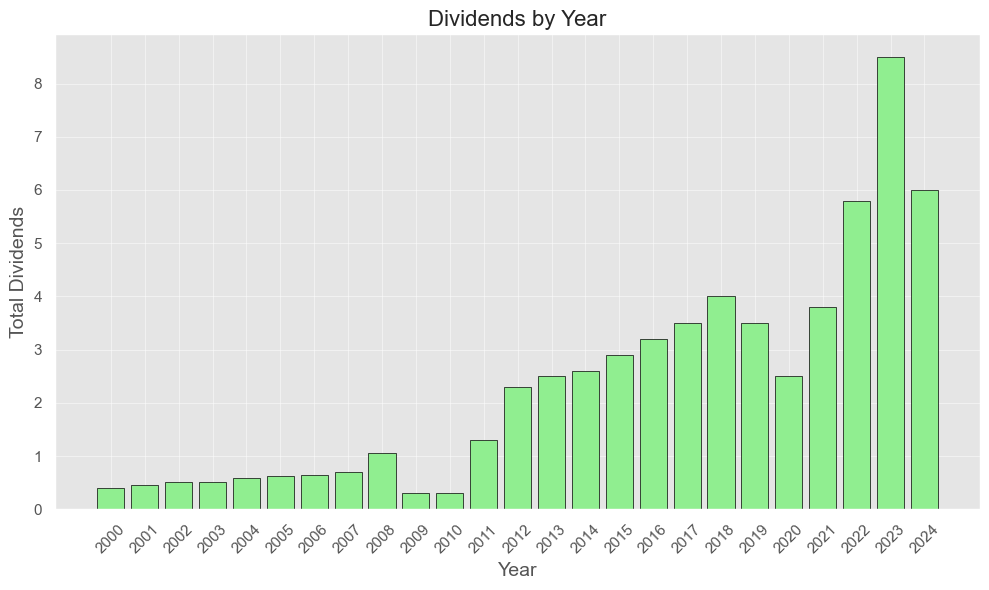

In [30]:
try:
    # Apply a style with more contrast
    plt.style.use("ggplot")
    plt.figure(figsize=(10, 6))

    # Use a more contrasting color for the bars
    plt.bar(df_new_dividends_converted['Year'], df_new_dividends_converted['Dividends'], color='lightgreen', edgecolor='black')

    # Set x-axis ticks to display every year, and rotate them
    plt.xticks(np.arange(df_new_dividends_converted['Year'].min(), df_new_dividends_converted['Year'].max() + 1, 1), rotation=45)

    # Add labels and title
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Total Dividends', fontsize=14)
    plt.title('Dividends by Year', fontsize=16)

    # Improve grid visibility
    plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

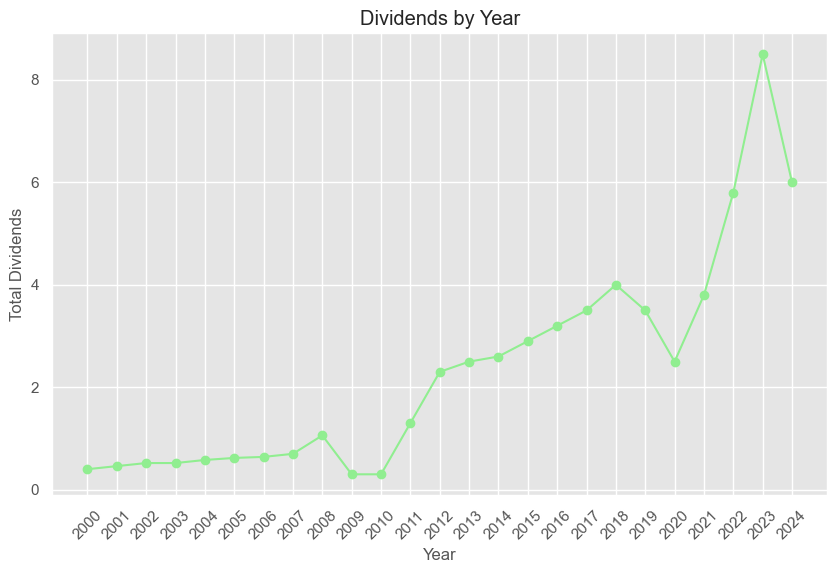

In [31]:
try:   
    # Define the style and figure size
    plt.style.use("ggplot")
    plt.figure(figsize=(10, 6))

    # Plot the data
    plt.plot(df_new_dividends_converted['Year'], df_new_dividends_converted['Dividends'], marker = 'o', color='lightgreen')

    # Set x-axis ticks to display every year between 1 and rotate them
    plt.xticks(np.arange(df_new_dividends_converted['Year'].min(), df_new_dividends_converted['Year'].max() + 1, 1), rotation=45)

    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Total Dividends')
    plt.title('Dividends by Year')

    # Show grid and plot
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

In [32]:
try:
    dividend_Yield = stock_info['dividendYield']
    print(dividend_Yield)
except Exception:
    print("An exception occurred") 

6.26


In [33]:
try:
    trailingAnnualDividendYield = stock_info['trailingAnnualDividendYield']
    print(trailingAnnualDividendYield)
except Exception:
    print("An exception occurred") 

0.06265657


In [34]:
try:
    avg_DvidendYield_5_years = stock_info['fiveYearAvgDividendYield']
    print(avg_DvidendYield_5_years)
except Exception:
    print("An exception occurred") 

5.76


In [35]:
try:
    payoutRatio = stock_info['payoutRatio']
    print(payoutRatio)
except Exception:
    print("An exception occurred") 

0.5164


In [36]:
stock.splits

Series([], Name: Stock Splits, dtype: float64)

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 4. Balance Sheet Statement

In [37]:
balance_sheet_df = pd.DataFrame(stock.balance_sheet).astype(float)
balance_sheet_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31
Treasury Shares Number,1.645676e+07,NaN,NaN,NaN
Ordinary Shares Number,6.222593e+08,6.387161e+08,6.628395e+08,6.613995e+08
Share Issued,6.387161e+08,6.387161e+08,6.628395e+08,6.613995e+08
Net Debt,6.366400e+10,5.168200e+10,5.192700e+10,6.530400e+10
Total Debt,8.550400e+10,7.154800e+10,7.156100e+10,8.373300e+10
Tangible Book Value,7.209500e+10,6.957400e+10,6.534900e+10,6.138600e+10
Invested Capital,1.752660e+11,1.586050e+11,1.559220e+11,1.556790e+11
Working Capital,8.698000e+09,7.971000e+09,7.783000e+09,9.707000e+09
Net Tangible Assets,7.209500e+10,6.957400e+10,6.534900e+10,6.138600e+10
Capital Lease Obligations,2.553000e+09,2.539000e+09,2.764000e+09,2.420000e+09


In [38]:
balance_sheet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, Treasury Shares Number to Cash And Cash Equivalents
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2024-12-31 00:00:00  73 non-null     float64
 1   2023-12-31 00:00:00  72 non-null     float64
 2   2022-12-31 00:00:00  73 non-null     float64
 3   2021-12-31 00:00:00  73 non-null     float64
dtypes: float64(4)
memory usage: 2.9+ KB


## 4.1 Retained Earnings

In [39]:
try:
  retained_earnings = balance_sheet_df.loc['Retained Earnings']
  retained_earnings_df = retained_earnings.to_frame(name='Retained Earnings')
  print(retained_earnings_df)
except Exception:
  print("An exception occurred") 

An exception occurred


In [40]:
try:
    # Calculate percentage changes
    retained_earnings_pct_diff = calculate_pct_diff(balance_sheet_df.loc['Retained Earnings'])
    
    # Convert result into a DataFrame for readability
    retained_earnings_pct_diff_df = pd.DataFrame(
        [retained_earnings_pct_diff],
        columns = balance_sheet_df.columns[:-1],  # Exclude the last column since it has no comparison
        index=['% Change in Retained Earnings']
    )
    print(retained_earnings_pct_diff)
except Exception:
    print("An exception occurred") 
    

An exception occurred


In [41]:
try:
    retained_earnings_pct_diff_df_T  = retained_earnings_pct_diff_df.T
    print(retained_earnings_pct_diff_df_T)
except Exception:
    print("An exception occurred") 

An exception occurred


An exception occurred: name 'retained_earnings_df' is not defined


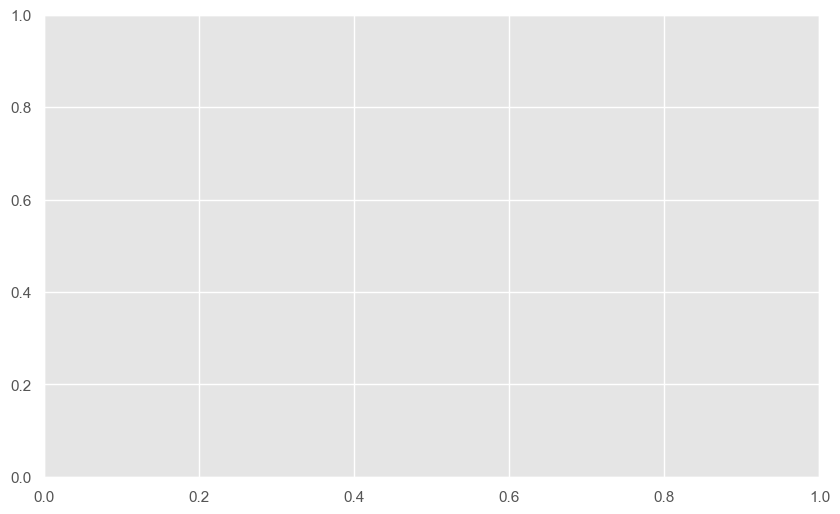

In [42]:
try:
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the Retained Earnings data
    ax.plot(retained_earnings_df.index, retained_earnings_df['Retained Earnings'], marker='o', color='lightgreen', label='Retained Earnings')

    # Annotate the plot with percentage change values from retained_earnings_pct_diff_df_T
    for date, pct_change in retained_earnings_pct_diff_df_T['% Change in Retained Earnings'].items():
        if not pd.isna(pct_change):  # Only annotate if there's a valid percentage change
            ax.annotate(f'{pct_change:.2f}%', 
                        xy=(date, retained_earnings_df.loc[date, 'Retained Earnings']), 
                        xytext=(0, 10),  # Offset to place text above the marker
                        textcoords='offset points',
                        fontsize=10, 
                        color='black', 
                        ha='center')  # Align text horizontally at the center of the point

    # Set labels and title
    plt.xlabel('Years')
    plt.ylabel('Retained Earnings')
    plt.title('Retained Earnings with Percentage Change Annotations')

    # Rotate date labels for better readability
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An exception occurred: {e}")

## 4.2 Liabilities

In [43]:
balance_df_liabilities = balance_sheet_df.loc[['Payables','Current Debt And Capital Lease Obligation','Current Liabilities','Long Term Debt And Capital Lease Obligation', 'Total Capitalization']]
balance_df_liabilities

,2024-12-31,2023-12-31,2022-12-31,2021-12-31
Payables,1.525700e+10,1.694800e+10,1.534400e+10,1.185300e+10
Current Debt And Capital Lease Obligation,2.766400e+10,2.592400e+10,2.534700e+10,2.606400e+10
Current Liabilities,8.768900e+10,8.700100e+10,8.442100e+10,7.646600e+10
Long Term Debt And Capital Lease Obligation,5.784000e+10,4.562400e+10,4.621400e+10,5.766900e+10
Total Capitalization,1.481220e+11,1.331650e+11,1.311080e+11,1.300900e+11


In [44]:
pct_diff_balance_df_liabilities = balance_df_liabilities.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(balance_df_liabilities.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_balance_df_liabilities.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_balance_df_liabilities

,2024 vs 2023,2023 vs 2022,2022 vs 2021
Payables,-9.977578,10.453597,29.452459
Current Debt And Capital Lease Obligation,6.711927,2.276404,-2.750921
Current Liabilities,0.790796,3.056112,10.403317
Long Term Debt And Capital Lease Obligation,26.775381,-1.276669,-19.863358
Total Capitalization,11.231930,1.568936,0.782535


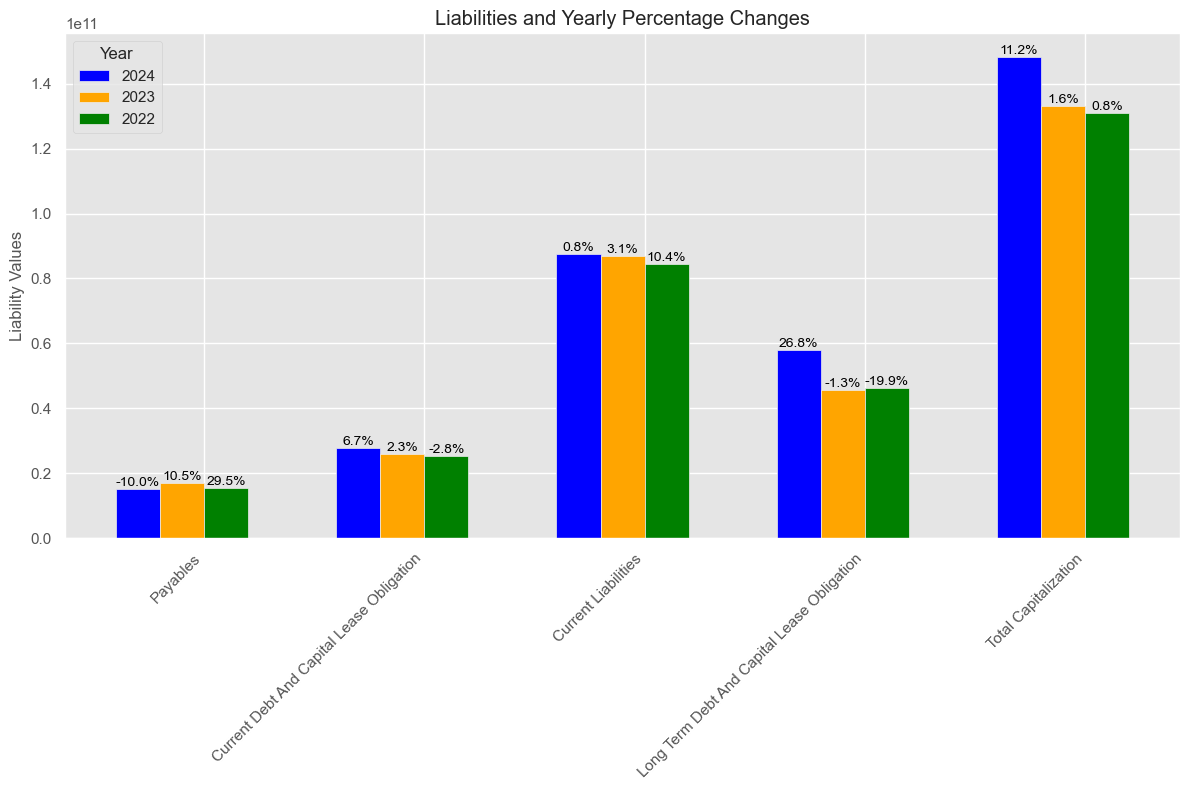

In [45]:
# Format column names
year_columns = [str(col)[:4] for col in balance_df_liabilities.columns]
pct_diff_balance_df_liabilities.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(balance_df_liabilities.index))  # X positions
width = 0.2  # Bar width
colors = ['blue', 'orange', 'green', 'red']

for i, (col, color) in enumerate(zip(balance_df_liabilities.columns[:-1], colors)):
    values = balance_df_liabilities[col]
    ax.bar(x + i * width, values, width=width, label=str(col)[:4], color=color)
    
    # Add percentage text annotations
    for j, val in enumerate(values):
        if not np.isnan(val):
            pct_change = pct_diff_balance_df_liabilities.iloc[j, i]
            if not np.isnan(pct_change):
                ax.text(x[j] + i * width, val, f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels & formatting
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(balance_df_liabilities.index, rotation=45, ha='right')
ax.set_ylabel("Liability Values")
ax.set_title("Liabilities and Yearly Percentage Changes")
ax.legend(title="Year")
plt.tight_layout()
plt.show()

## 4.3 Assets 

In [46]:
balance_df_assets = balance_sheet_df.loc[['Accounts Receivable','Cash And Cash Equivalents','Current Assets','Net PPE','Goodwill And Other Intangible Assets']]
balance_df_assets

,2024-12-31,2023-12-31,2022-12-31,2021-12-31
Accounts Receivable,4.140300e+10,4.100000e+10,3.946700e+10,3.796600e+10
Cash And Cash Equivalents,1.928700e+10,1.732700e+10,1.687000e+10,1.600900e+10
Current Assets,9.638700e+10,9.497200e+10,9.220400e+10,8.617300e+10
Net PPE,8.841900e+10,7.838400e+10,7.494600e+10,6.709000e+10
Goodwill And Other Intangible Assets,2.022000e+10,2.002200e+10,2.177600e+10,1.298000e+10


In [47]:
pct_diff_balance_df_assets = balance_df_assets.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(balance_df_assets.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_balance_df_assets.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_balance_df_assets

,2024 vs 2023,2023 vs 2022,2022 vs 2021
Accounts Receivable,0.982927,3.884258,3.953537
Cash And Cash Equivalents,11.311825,2.708951,5.378225
Current Assets,1.489913,3.002039,6.998712
Net PPE,12.802358,4.587303,11.709644
Goodwill And Other Intangible Assets,0.988912,-8.054739,67.765794


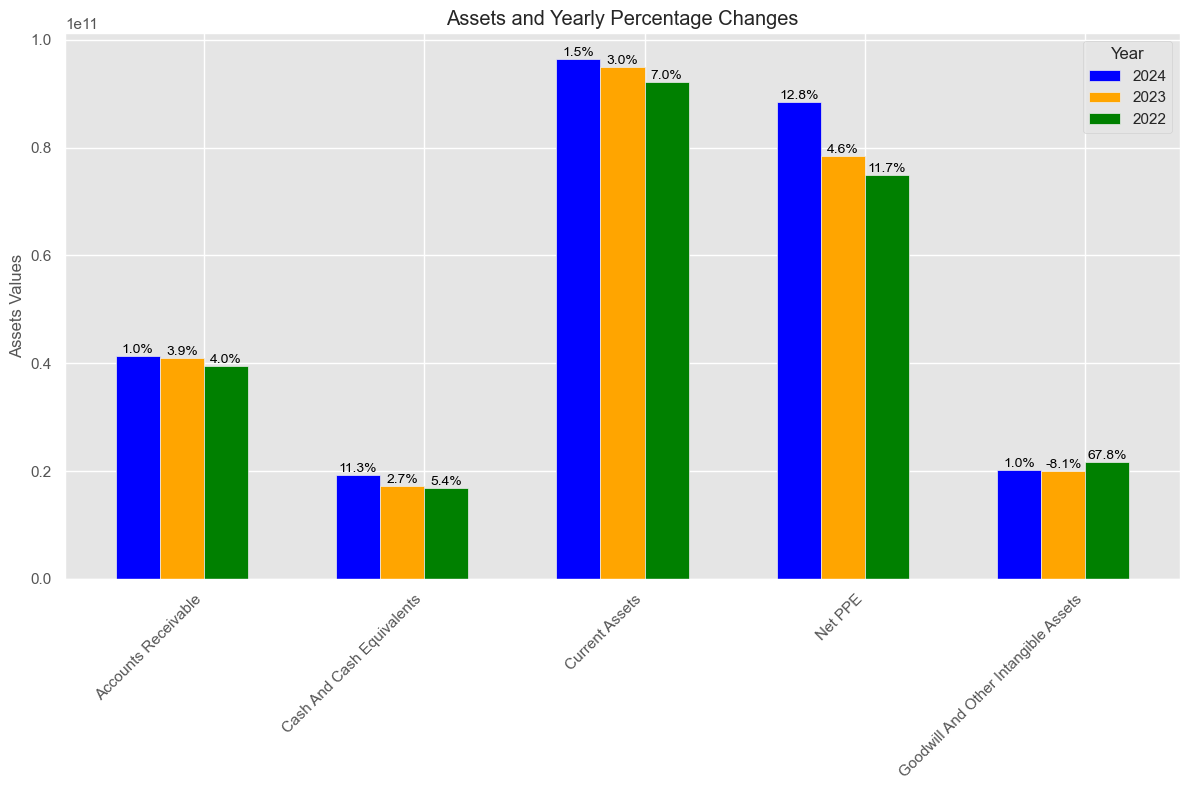

In [48]:
# Format column names
year_columns = [str(col)[:4] for col in balance_df_assets.columns]
pct_diff_balance_df_assets.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(balance_df_assets.index))  # X positions
width = 0.2  # Bar width
colors = ['blue', 'orange', 'green', 'red']

for i, (col, color) in enumerate(zip(balance_df_assets.columns[:-1], colors)):
    values = balance_df_assets[col]
    ax.bar(x + i * width, values, width=width, label=str(col)[:4], color=color)
    
    # Add percentage text annotations
    for j, val in enumerate(values):
        if not np.isnan(val):
            pct_change = pct_diff_balance_df_assets.iloc[j, i]
            if not np.isnan(pct_change):
                ax.text(x[j] + i * width, val, f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels & formatting
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(balance_df_assets.index, rotation=45, ha='right')
ax.set_ylabel("Assets Values")
ax.set_title("Assets and Yearly Percentage Changes")
ax.legend(title="Year")
plt.tight_layout()
plt.show()

## 4.4 Balance Sheet for the last year with Vertical Analysis

In [49]:
balance_sheet_df_last = pd.DataFrame(balance_sheet_df.iloc[:,0])
balance_sheet_df_last

,2024-12-31
Treasury Shares Number,1.645676e+07
Ordinary Shares Number,6.222593e+08
Share Issued,6.387161e+08
Net Debt,6.366400e+10
Total Debt,8.550400e+10
Tangible Book Value,7.209500e+10
Invested Capital,1.752660e+11
Working Capital,8.698000e+09
Net Tangible Assets,7.209500e+10
Capital Lease Obligations,2.553000e+09


In [50]:
total_assets = balance_sheet_df_last.loc['Total Assets'].values[0]
balance_sheet_df_last['Percentage from Total Assets/Liabilities'] = balance_sheet_df_last.iloc[:, [0]] / total_assets * 100
balance_sheet_df_last

,2024-12-31 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,1.645676e+07,0.006147
Ordinary Shares Number,6.222593e+08,0.232419
Share Issued,6.387161e+08,0.238565
Net Debt,6.366400e+10,23.779003
Total Debt,8.550400e+10,31.936414
Tangible Book Value,7.209500e+10,26.928047
Invested Capital,1.752660e+11,65.463224
Working Capital,8.698000e+09,3.248771
Net Tangible Assets,7.209500e+10,26.928047
Capital Lease Obligations,2.553000e+09,0.953566


## 4.5 Balance Sheet for the previous year with Vertical Analysis

In [51]:
balance_sheet_df = pd.DataFrame(stock.balance_sheet).astype(float)
balance_sheet_df_prev = pd.DataFrame(balance_sheet_df.iloc[:,1])
balance_sheet_df_prev

,2023-12-31
Treasury Shares Number,NaN
Ordinary Shares Number,6.387161e+08
Share Issued,6.387161e+08
Net Debt,5.168200e+10
Total Debt,7.154800e+10
Tangible Book Value,6.957400e+10
Invested Capital,1.586050e+11
Working Capital,7.971000e+09
Net Tangible Assets,6.957400e+10
Capital Lease Obligations,2.539000e+09


In [52]:
total_assets = balance_sheet_df_prev.loc['Total Assets'].values[0]
balance_sheet_df_prev['Percentage from Total Assets/Liabilities'] = balance_sheet_df_prev.iloc[:, [0]] / total_assets * 100
balance_sheet_df_prev

,2023-12-31 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,NaN,NaN
Ordinary Shares Number,6.387161e+08,0.254580
Share Issued,6.387161e+08,0.254580
Net Debt,5.168200e+10,20.599466
Total Debt,7.154800e+10,28.517677
Tangible Book Value,6.957400e+10,27.730878
Invested Capital,1.586050e+11,63.216948
Working Capital,7.971000e+09,3.177090
Net Tangible Assets,6.957400e+10,27.730878
Capital Lease Obligations,2.539000e+09,1.011997


## 4.6 Balance Sheet for the last two years with Vertical Analysis

In [53]:
df_concat_balance = pd.concat([balance_sheet_df_last, balance_sheet_df_prev], axis=1)
df_concat_balance

,2024-12-31 00:00:00,Percentage from Total Assets/Liabilities,2023-12-31 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,1.645676e+07,0.006147,NaN,NaN
Ordinary Shares Number,6.222593e+08,0.232419,6.387161e+08,0.254580
Share Issued,6.387161e+08,0.238565,6.387161e+08,0.254580
Net Debt,6.366400e+10,23.779003,5.168200e+10,20.599466
Total Debt,8.550400e+10,31.936414,7.154800e+10,28.517677
Tangible Book Value,7.209500e+10,26.928047,6.957400e+10,27.730878
Invested Capital,1.752660e+11,65.463224,1.586050e+11,63.216948
Working Capital,8.698000e+09,3.248771,7.971000e+09,3.177090
Net Tangible Assets,7.209500e+10,26.928047,6.957400e+10,27.730878
Capital Lease Obligations,2.553000e+09,0.953566,2.539000e+09,1.011997


In [54]:
try:
  retained_earnings = df_concat_balance.loc['Retained Earnings'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(retained_earnings)
except Exception:
  print("An exception occurred") 

An exception occurred


In [55]:
df_concat_balance.loc['Total Capitalization'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         148122000000.000000
Percentage from Total Assets/Liabilities              55.324728
2023-12-31 00:00:00                         133165000000.000000
Percentage from Total Assets/Liabilities              53.077046
Name: Total Capitalization, dtype: object

In [56]:
df_concat_balance.loc['Net PPE'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         88419000000.000000
Percentage from Total Assets/Liabilities             33.025189
2023-12-31 00:00:00                         78384000000.000000
Percentage from Total Assets/Liabilities             31.242377
Name: Net PPE, dtype: object

In [57]:
df_concat_balance.loc['Long Term Debt And Capital Lease Obligation'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         57840000000.000000
Percentage from Total Assets/Liabilities             21.603693
2023-12-31 00:00:00                         45624000000.000000
Percentage from Total Assets/Liabilities             18.184862
Name: Long Term Debt And Capital Lease Obligation, dtype: object

In [58]:
try:
    goodwill = df_concat_balance.loc['Goodwill'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
    print(goodwill)
except Exception:
    print("An exception occurred") 

2024-12-31 00:00:00                         1529000000.000000
Percentage from Total Assets/Liabilities             0.571093
2023-12-31 00:00:00                         1487000000.000000
Percentage from Total Assets/Liabilities             0.592690
Name: Goodwill, dtype: object


In [59]:
df_concat_balance.loc['Current Liabilities'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         87689000000.000000
Percentage from Total Assets/Liabilities             32.752529
2023-12-31 00:00:00                         87001000000.000000
Percentage from Total Assets/Liabilities             34.676950
Name: Current Liabilities, dtype: object

In [60]:
df_concat_balance.loc['Cash And Cash Equivalents'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         19287000000.000000
Percentage from Total Assets/Liabilities              7.203846
2023-12-31 00:00:00                         17327000000.000000
Percentage from Total Assets/Liabilities              6.906214
Name: Cash And Cash Equivalents, dtype: object

In [61]:
try:
  texes_receivable = df_concat_balance.loc['Taxes Receivable'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(texes_receivable)
except Exception:
  print("An exception occurred") 

2024-12-31 00:00:00                         1316000000.000000
Percentage from Total Assets/Liabilities             0.491536
2023-12-31 00:00:00                         1199000000.000000
Percentage from Total Assets/Liabilities             0.477899
Name: Taxes Receivable, dtype: object


In [62]:
try:
  account_receivable = df_concat_balance.loc['Accounts Receivable'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(account_receivable)
except Exception:
  print("An exception occurred") 

2024-12-31 00:00:00                         41403000000.000000
Percentage from Total Assets/Liabilities             15.464345
2023-12-31 00:00:00                         41000000000.000000
Percentage from Total Assets/Liabilities             16.341823
Name: Accounts Receivable, dtype: object


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 5. Cash Flow Statement

In [63]:
cash_flow = stock.cash_flow.astype(float)
cash_flow

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Free Cash Flow,-4.639000e+09,6.661000e+09,1.447300e+10,9.295000e+09,NaN
Repurchase Of Capital Stock,-1.024000e+09,-1.242000e+09,-1.278000e+09,0.000000e+00,NaN
Repayment Of Debt,-2.218200e+10,-2.243000e+10,-2.610200e+10,-2.643400e+10,NaN
Issuance Of Debt,3.002500e+10,2.063300e+10,1.605000e+10,1.881100e+10,NaN
Issuance Of Capital Stock,NaN,0.000000e+00,8.500000e+07,1.030000e+08,2.800000e+07
Capital Expenditure,-1.220500e+10,-1.088100e+10,-9.050000e+09,-6.619000e+09,NaN
End Cash Position,1.928700e+10,1.732700e+10,1.687000e+10,1.600900e+10,NaN
Other Cash Adjustment Outside Changein Cash,NaN,2.700000e+07,-1.000000e+07,NaN,-4.000000e+07
Beginning Cash Position,1.732700e+10,1.687000e+10,1.600900e+10,1.353700e+10,NaN
Effect Of Exchange Rate Changes,-3.000000e+06,-7.050000e+08,1.040000e+08,-3.070000e+08,NaN


## 5.1 Free Cash Flow

In [64]:
free_cash_flow = pd.DataFrame(cash_flow.loc['Free Cash Flow'])
free_cash_flow

,Free Cash Flow
2024-12-31,-4.639000e+09
2023-12-31,6.661000e+09
2022-12-31,1.447300e+10
2021-12-31,9.295000e+09
2020-12-31,NaN


In [65]:
# Calculate percentage changes
free_cash_flow_pct_diff = calculate_pct_diff(cash_flow.loc['Free Cash Flow'])

# Convert result into a DataFrame for readability
free_cash_flow_pct_diff_df = pd.DataFrame(
    [free_cash_flow_pct_diff],
    columns=cash_flow.columns[:-1],  # Exclude the last column since it has no comparison
    index=['% Change in Free Cash Flow']
)
free_cash_flow_pct_diff_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31
% Change in Free Cash Flow,-169.644198,-53.97637,55.70737,NaN


In [66]:
free_cash_flow_pct_diff_df_T  = free_cash_flow_pct_diff_df.T
free_cash_flow_pct_diff_df_T

,% Change in Free Cash Flow
2024-12-31,-169.644198
2023-12-31,-53.976370
2022-12-31,55.707370
2021-12-31,NaN


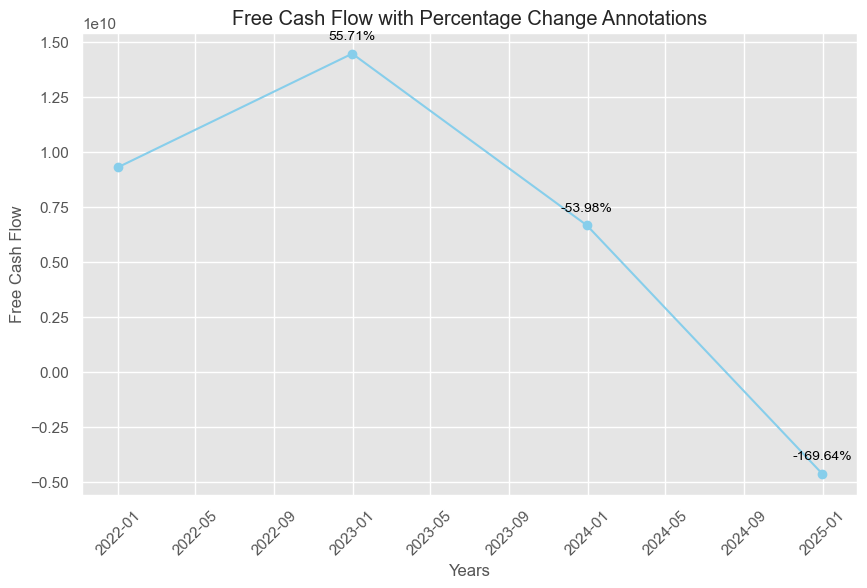

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Free Cash Flow data
ax.plot(free_cash_flow.index, free_cash_flow['Free Cash Flow'], marker = 'o', color = 'skyblue')

# Annotate the plot with percentage change values from free_cash_flow_pct_diff_df_T
for date, pct_change in free_cash_flow_pct_diff_df_T['% Change in Free Cash Flow'].items():
    if not pd.isna(pct_change):  # Only annotate if there's a valid percentage change
        # Adjust the text offset for better visibility below the markers
        ax.annotate(f'{pct_change:.2f}%', 
                    xy=(date, free_cash_flow.loc[date, 'Free Cash Flow']), 
                    xytext=(0, 10),  # Negative vertical offset to place text above the marker
                    textcoords='offset points',
                    fontsize=10, 
                    color='black', 
                    ha='center')  # Align text horizontally at the center of the point

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Free Cash Flow')
plt.title('Free Cash Flow with Percentage Change Annotations')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## 5.2 Cash Flow DF

In [68]:
cash_flow_df = cash_flow.loc[['Operating Cash Flow','Investing Cash Flow', 'Financing Cash Flow']]
cash_flow_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Operating Cash Flow,7.566000e+09,1.754200e+10,2.352300e+10,1.591400e+10,NaN
Investing Cash Flow,-1.136900e+10,-9.548000e+09,-4.772000e+09,-6.400000e+09,NaN
Financing Cash Flow,5.766000e+09,-6.859000e+09,-1.798400e+10,-6.735000e+09,NaN


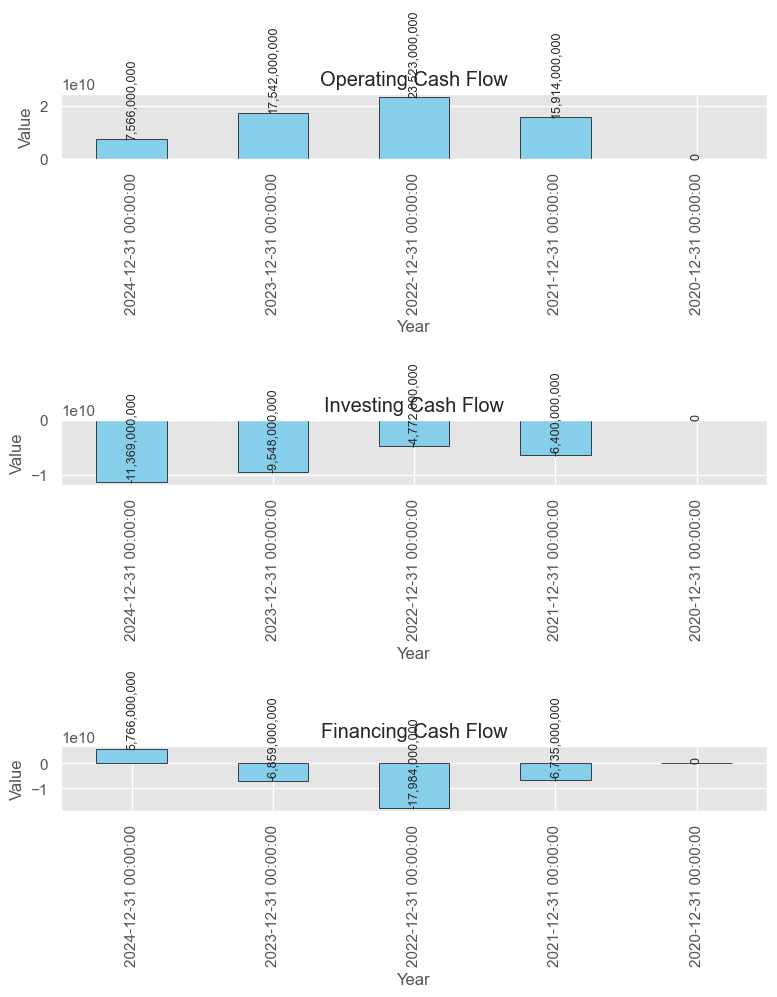

In [69]:
transposed_cash_flow_df = cash_flow_df.T

# Plot each column as a bar plot in subplots
transposed_cash_flow_df.plot(
    kind='bar',
    subplots=True,
    figsize=(8, 10),
    sharex=False,
    sharey=False,
    legend=False,  # Hide legends since column names are the titles
    color='skyblue',
    edgecolor='black',
)

# Add titles and layout adjustments
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(transposed_cash_flow_df.columns[i])  # Set column names as titles
    ax.set_xlabel("Year")
    ax.set_ylabel("Value")
    for bar in ax.patches:
        height = bar.get_height()
        if not pd.isna(height):  # Annotate bar values
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{height:,.0f}",
                ha="center",
                va="bottom",
                fontsize=9,
                rotation=90,
            )

plt.tight_layout()
plt.show()

## 5.3 Percentage changes in Cash Flow DF

In [70]:
pct_diff_cash_flow_df = cash_flow_df.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(cash_flow_df.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_cash_flow_df.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_cash_flow_df

,2024 vs 2023,2023 vs 2022,2022 vs 2021,2021 vs 2020
Operating Cash Flow,-56.869228,-25.426179,47.813246,NaN
Investing Cash Flow,19.072057,100.083822,-25.437500,NaN
Financing Cash Flow,-184.064732,-61.860543,167.023014,NaN


In [71]:
transposed_pct_diff_cash_flow_df = pct_diff_cash_flow_df.T
transposed_pct_diff_cash_flow_df

,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow
2024 vs 2023,-56.869228,19.072057,-184.064732
2023 vs 2022,-25.426179,100.083822,-61.860543
2022 vs 2021,47.813246,-25.437500,167.023014
2021 vs 2020,NaN,NaN,NaN


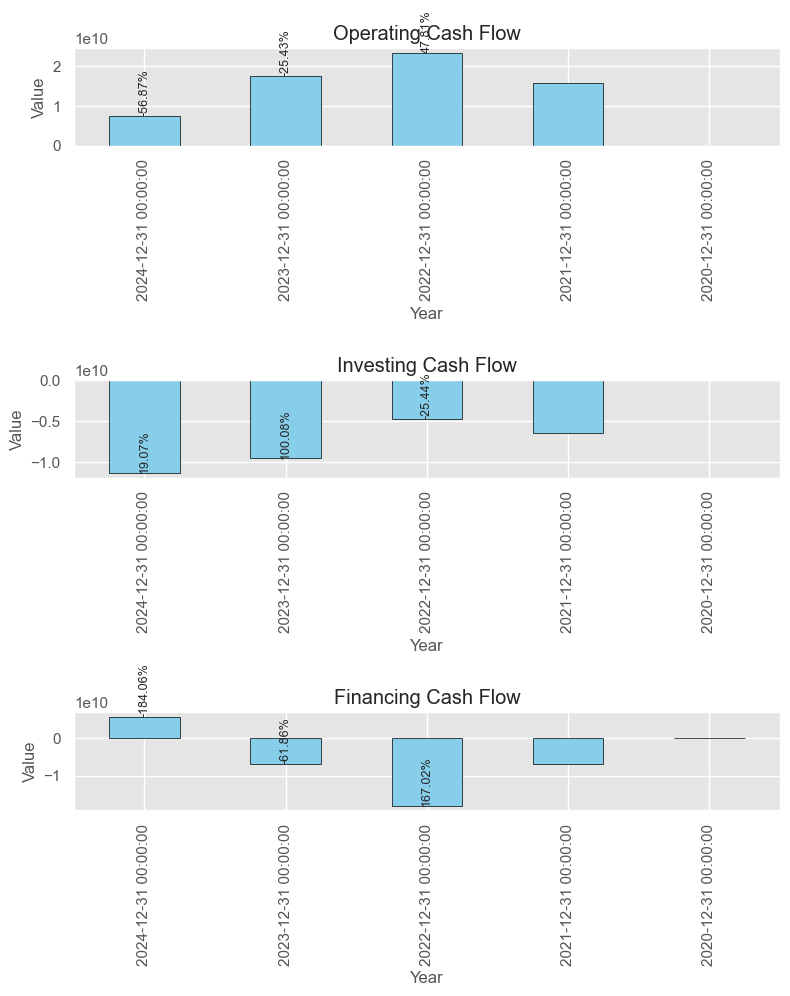

In [72]:
# Remove empty plots if any (subplots with no data)
fig, axes = plt.subplots(figsize=(8, 10), nrows=transposed_cash_flow_df.shape[1], ncols=1)

# Plot the raw cash flow data (values) and percentage changes
for i, ax in enumerate(axes):
    if i < transposed_cash_flow_df.shape[1]:  # Ensure we're within bounds
        # Plot each row (corresponding to a year) as a bar plot
        transposed_cash_flow_df.iloc[:, i].plot(
            kind='bar',
            ax=ax,
            color='skyblue',
            edgecolor='black',
            legend=False,
        )

        # Set the title and labels
        ax.set_title(transposed_cash_flow_df.columns[i])  # Set the title for each subplot
        ax.set_xlabel("Year")
        ax.set_ylabel("Value")

        # Add annotations for percentage changes
        for j, bar in enumerate(ax.patches):
            height = bar.get_height()

            if not pd.isna(height):  # Check if the value is not NaN
                # Extract the corresponding percentage change
                if j < len(transposed_pct_diff_cash_flow_df.index) and i < len(transposed_pct_diff_cash_flow_df.columns):
                    pct_change = transposed_pct_diff_cash_flow_df.iloc[j, i]  # Correct row and column access
                else:
                    pct_change = None

                if pd.notna(pct_change):  # Only annotate if the percentage change is available
                    ax.text(
                        bar.get_x() + bar.get_width() / 2,
                        bar.get_height(),
                        f"{pct_change:.2f}%",  # Annotation with percentage change
                        ha="center",
                        va="bottom",
                        fontsize=9,
                        rotation=90,
                    )

plt.tight_layout()
plt.show()

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 6. Income Statement

In [73]:
income_statement = pd.DataFrame(stock.income_stmt).astype(float)
income_statement

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-1.767913e+08,-3.567880e+08,1.980300e+08,1.128960e+08,NaN
Tax Rate For Calcs,3.001550e-01,2.884300e-01,2.100000e-01,2.240000e-01,NaN
Normalized EBITDA,2.078300e+10,2.796300e+10,3.136200e+10,2.228700e+10,NaN
Total Unusual Items,-5.890000e+08,-1.237000e+09,9.430000e+08,5.040000e+08,NaN
Total Unusual Items Excluding Goodwill,-5.890000e+08,-1.237000e+09,9.430000e+08,5.040000e+08,NaN
Net Income From Continuing Operation Net Minority Interest,7.290000e+09,1.129000e+10,1.794100e+10,1.238200e+10,NaN
Reconciled Depreciation,8.650000e+09,8.974000e+09,8.566000e+09,6.495000e+09,NaN
Reconciled Cost Of Revenue,1.194850e+11,1.258090e+11,1.180420e+11,8.925300e+10,NaN
EBITDA,2.019400e+10,2.672600e+10,3.230500e+10,2.279100e+10,NaN
EBIT,1.154400e+10,1.775200e+10,2.373900e+10,1.629600e+10,NaN


## 6.1 Income Statement DF

In [74]:
income_statement_df = income_statement.loc[['Total Revenue','Total Expenses','Net Income Common Stockholders',
                                                'Diluted EPS']]
income_statement_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Total Revenue,1.423800e+11,1.554980e+11,1.426100e+11,1.112390e+11,NaN
Total Expenses,1.309860e+11,1.370220e+11,1.284010e+11,9.778500e+10,NaN
Net Income Common Stockholders,6.629600e+09,1.025030e+10,1.632770e+10,1.129840e+10,NaN
Diluted EPS,1.162000e+01,1.767000e+01,2.731000e+01,1.877000e+01,NaN


In [75]:
pct_diff_income_statement_df = income_statement_df.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(income_statement_df.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_income_statement_df.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_income_statement_df

,2024 vs 2023,2023 vs 2022,2022 vs 2021,2021 vs 2020
Total Revenue,-8.436121,9.037234,28.201440,NaN
Total Expenses,-4.405132,6.714122,31.309506,NaN
Net Income Common Stockholders,-35.322869,-37.221409,44.513382,NaN
Diluted EPS,-34.238823,-35.298425,45.498135,NaN


In [76]:
transposed_df_income = income_statement_df.T
transposed_df_income

,Total Revenue,Total Expenses,Net Income Common Stockholders,Diluted EPS
2024-12-31,1.423800e+11,1.309860e+11,6.629600e+09,11.62
2023-12-31,1.554980e+11,1.370220e+11,1.025030e+10,17.67
2022-12-31,1.426100e+11,1.284010e+11,1.632770e+10,27.31
2021-12-31,1.112390e+11,9.778500e+10,1.129840e+10,18.77
2020-12-31,NaN,NaN,NaN,NaN


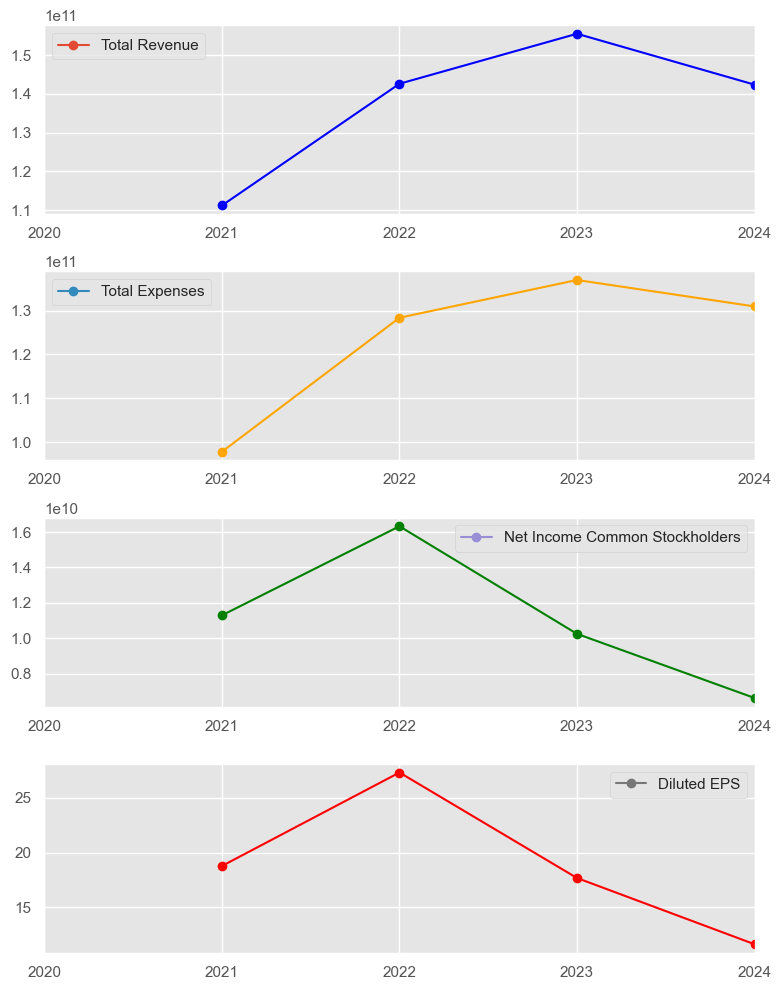

In [77]:
# Create subplots and assign unique colors
ax = transposed_df_income.plot(kind='line', marker='o', subplots=True, figsize=(8, 10), sharex=False, sharey=False)

# Assign distinct colors
for idx, axis in enumerate(ax):  # Loop through subplots
    color = colors[idx % len(colors)]  # Cycle through colors if needed
    for line in axis.get_lines():
        line.set_color(color)  # Apply unique color to each subplot

plt.tight_layout()
plt.show()

## 6.2 Percentage changes in Income Statement DF

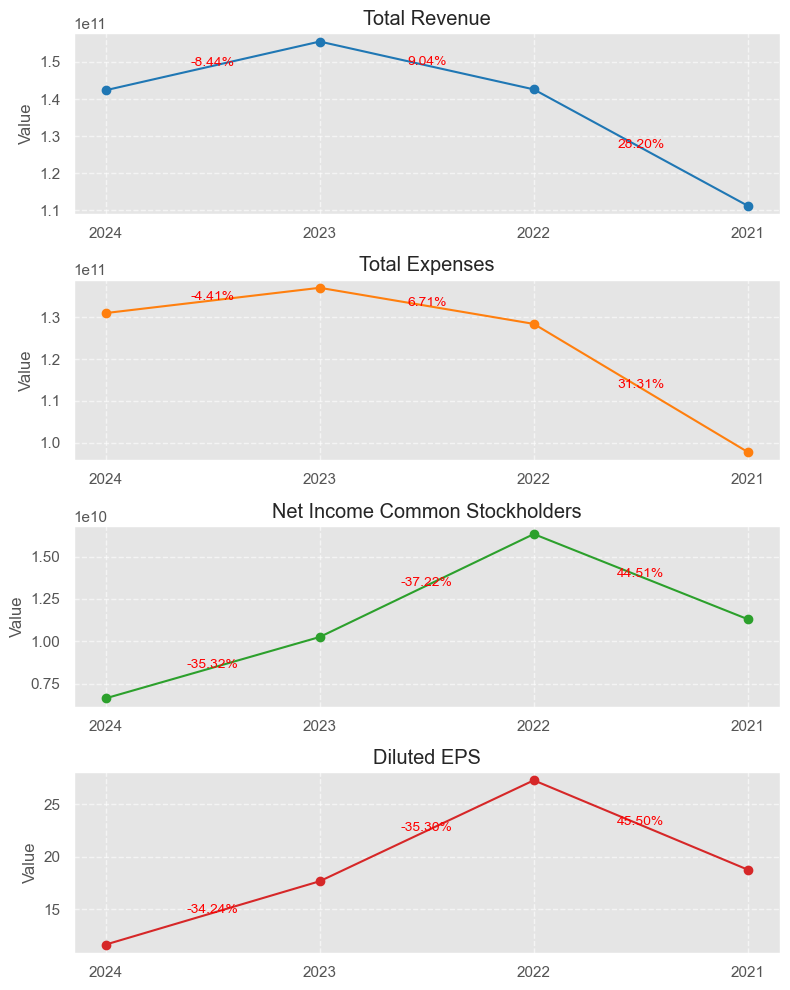

In [78]:
# Convert column names to years
years = [str(col.year) for col in income_statement_df.columns]

# Define colors
colors = plt.cm.tab10.colors

# Plot each row separately
fig, axes = plt.subplots(nrows=len(income_statement_df), figsize=(8, 10), sharex=False, sharey=False)

for idx, (ax, (row, values)) in enumerate(zip(axes, income_statement_df.iterrows())):
    color = colors[idx % len(colors)]  # Assign unique color
    ax.plot(years, values, marker='o', linestyle='-', label=row, color=color)
    ax.set_title(row)
    ax.set_ylabel("Value")
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Add percentage annotations
    pct_changes = pct_diff_income_statement_df.loc[row].values  # Convert to array for indexing
    for i in range(len(pct_changes)):
        if not np.isnan(pct_changes[i]):
            ax.text(i + 0.5, (values.iloc[i] + values.iloc[i+1]) / 2, f"{pct_changes[i]:.2f}%", 
                    fontsize=10, color='red', ha='center')

plt.tight_layout()
plt.show()

## 6.3 Income Statement for the last year with Vertical Analysis

In [79]:
income_statement_last = pd.DataFrame(income_statement.iloc[:,0])
income_statement_last

,2024-12-31
Tax Effect Of Unusual Items,-1.767913e+08
Tax Rate For Calcs,3.001550e-01
Normalized EBITDA,2.078300e+10
Total Unusual Items,-5.890000e+08
Total Unusual Items Excluding Goodwill,-5.890000e+08
Net Income From Continuing Operation Net Minority Interest,7.290000e+09
Reconciled Depreciation,8.650000e+09
Reconciled Cost Of Revenue,1.194850e+11
EBITDA,2.019400e+10
EBIT,1.154400e+10


In [80]:
revenue = income_statement_last.loc['Operating Revenue'].values[0]
income_statement_last['Percentage from Operating Revenue'] = income_statement_last.iloc[:, [0]] / revenue * 100
income_statement_last

,2024-12-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,-1.767913e+08,-1.241686e-01
Tax Rate For Calcs,3.001550e-01,2.108126e-10
Normalized EBITDA,2.078300e+10,1.459685e+01
Total Unusual Items,-5.890000e+08,-4.136817e-01
Total Unusual Items Excluding Goodwill,-5.890000e+08,-4.136817e-01
Net Income From Continuing Operation Net Minority Interest,7.290000e+09,5.120101e+00
Reconciled Depreciation,8.650000e+09,6.075291e+00
Reconciled Cost Of Revenue,1.194850e+11,8.391979e+01
EBITDA,2.019400e+10,1.418317e+01
EBIT,1.154400e+10,8.107880e+00


## 6.4 Income Statement for the previous year with Vertical Analysis

In [81]:
income_statement_prev = pd.DataFrame(income_statement.iloc[:,1])
income_statement_prev

,2023-12-31
Tax Effect Of Unusual Items,-3.567880e+08
Tax Rate For Calcs,2.884300e-01
Normalized EBITDA,2.796300e+10
Total Unusual Items,-1.237000e+09
Total Unusual Items Excluding Goodwill,-1.237000e+09
Net Income From Continuing Operation Net Minority Interest,1.129000e+10
Reconciled Depreciation,8.974000e+09
Reconciled Cost Of Revenue,1.258090e+11
EBITDA,2.672600e+10
EBIT,1.775200e+10


In [82]:
revenue = income_statement_prev.loc['Operating Revenue'].values[0]
income_statement_prev['Percentage from Operating Revenue'] = income_statement_prev.iloc[:, [0]] / revenue * 100
income_statement_prev

,2023-12-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,-3.567880e+08,-2.294486e-01
Tax Rate For Calcs,2.884300e-01,1.854879e-10
Normalized EBITDA,2.796300e+10,1.798287e+01
Total Unusual Items,-1.237000e+09,-7.955086e-01
Total Unusual Items Excluding Goodwill,-1.237000e+09,-7.955086e-01
Net Income From Continuing Operation Net Minority Interest,1.129000e+10,7.260544e+00
Reconciled Depreciation,8.974000e+09,5.771135e+00
Reconciled Cost Of Revenue,1.258090e+11,8.090715e+01
EBITDA,2.672600e+10,1.718736e+01
EBIT,1.775200e+10,1.141622e+01


## 6.5 Income Statement for the last two years with Vertical Analysis

In [83]:
df_concat_income = pd.concat([income_statement_last, income_statement_prev], axis=1)
df_concat_income

,2024-12-31 00:00:00,Percentage from Operating Revenue,2023-12-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,-1.767913e+08,-1.241686e-01,-3.567880e+08,-2.294486e-01
Tax Rate For Calcs,3.001550e-01,2.108126e-10,2.884300e-01,1.854879e-10
Normalized EBITDA,2.078300e+10,1.459685e+01,2.796300e+10,1.798287e+01
Total Unusual Items,-5.890000e+08,-4.136817e-01,-1.237000e+09,-7.955086e-01
Total Unusual Items Excluding Goodwill,-5.890000e+08,-4.136817e-01,-1.237000e+09,-7.955086e-01
Net Income From Continuing Operation Net Minority Interest,7.290000e+09,5.120101e+00,1.129000e+10,7.260544e+00
Reconciled Depreciation,8.650000e+09,6.075291e+00,8.974000e+09,5.771135e+00
Reconciled Cost Of Revenue,1.194850e+11,8.391979e+01,1.258090e+11,8.090715e+01
EBITDA,2.019400e+10,1.418317e+01,2.672600e+10,1.718736e+01
EBIT,1.154400e+10,8.107880e+00,1.775200e+10,1.141622e+01


In [84]:
df_concat_income.loc['Operating Revenue'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  142380000000.000000
Percentage from Operating Revenue             100.000000
2023-12-31 00:00:00                  155498000000.000000
Percentage from Operating Revenue             100.000000
Name: Operating Revenue, dtype: object

In [85]:
df_concat_income.loc['Cost Of Revenue'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)


2024-12-31 00:00:00                  119485000000.000000
Percentage from Operating Revenue              83.919792
2023-12-31 00:00:00                  125809000000.000000
Percentage from Operating Revenue              80.907150
Name: Cost Of Revenue, dtype: object

In [86]:
df_concat_income.loc['Gross Profit'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  22895000000.000000
Percentage from Operating Revenue             16.080208
2023-12-31 00:00:00                  29689000000.000000
Percentage from Operating Revenue             19.092850
Name: Gross Profit, dtype: object

In [87]:
df_concat_income.loc['Operating Expense'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  11501000000.000000
Percentage from Operating Revenue              8.077679
2023-12-31 00:00:00                  11213000000.000000
Percentage from Operating Revenue              7.211025
Name: Operating Expense, dtype: object

In [88]:
df_concat_income.loc['Operating Income'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  11394000000.000000
Percentage from Operating Revenue              8.002528
2023-12-31 00:00:00                  18476000000.000000
Percentage from Operating Revenue             11.881825
Name: Operating Income, dtype: object

In [89]:
df_concat_income.loc['Net Income Common Stockholders'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                   6629600000.000000
Percentage from Operating Revenue              4.656272
2023-12-31 00:00:00                  10250300000.000000
Percentage from Operating Revenue              6.591918
Name: Net Income Common Stockholders, dtype: object

In [90]:
df_concat_income.loc['EBITDA'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  20194000000.000000
Percentage from Operating Revenue             14.183172
2023-12-31 00:00:00                  26726000000.000000
Percentage from Operating Revenue             17.187359
Name: EBITDA, dtype: object

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 7. Ratio Analysis

__Gross Profit Margin__

In [91]:
gross_profit_margin = (income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float) - income_statement.loc['Cost Of Revenue'].replace(0, np.nan).astype(float)) / income_statement_df.loc['Total Revenue'].replace(0, np.nan).astype(float) * 100
gross_profit_margin

2024-12-31    16.080208
2023-12-31    19.092850
2022-12-31    17.227403
2021-12-31    19.764651
2020-12-31          NaN
dtype: float64

__Operating Profit Margin__

In [92]:
operating_profit_margin = (income_statement.loc['Operating Income'].replace(0, np.nan).astype(float) /  income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float)) * 100
operating_profit_margin

2024-12-31     8.002528
2023-12-31    11.881825
2022-12-31     9.963537
2021-12-31    12.094679
2020-12-31          NaN
dtype: float64

__Net Profit Margin__

In [93]:
net_profit_margin = (income_statement.loc['Net Income'].replace(0, np.nan).astype(float)/ income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float)) * 100
net_profit_margin

2024-12-31     5.120101
2023-12-31     7.260544
2022-12-31    12.580464
2021-12-31    11.130988
2020-12-31          NaN
dtype: float64

__Current Ratio__

In [94]:
current_ratio = balance_sheet_df.loc['Current Assets'].replace(0, np.nan).astype(float) / balance_sheet_df.loc['Current Liabilities'].replace(0, np.nan).astype(float)
current_ratio

2024-12-31    1.099191
2023-12-31    1.091620
2022-12-31    1.092193
2021-12-31    1.126945
dtype: float64

__Accounts Receivable Turnover__ <br>
The Accounts Receivable Turnover Ratio measures how efficiently a company collects its receivables. A higher ratio indicates effective collection processes and efficient use of assets.

In [95]:
ART = (income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float) - income_statement.loc['Net Income'].replace(0, np.nan).astype(float)) / balance_sheet_df.loc['Accounts Receivable'] 
ART

2020-12-31         NaN
2021-12-31    2.603830
2022-12-31    3.158816
2023-12-31    3.517268
2024-12-31    3.262807
Freq: YE-DEC, dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 8. ROIC & WACC

__ROIC__

In [96]:
effective_tax_rate = (
    income_statement.loc["Tax Provision"].replace(0, np.nan).astype(float) / 
    income_statement.loc["Pretax Income"].abs().replace(0, np.nan).astype(float)
).clip(0, 0.30).fillna(0.25)  # default to 25% if invalid
effective_tax_rate

2024-12-31    0.300000
2023-12-31    0.288430
2022-12-31    0.209579
2021-12-31    0.223973
2020-12-31    0.250000
dtype: float64

In [97]:
nopat = income_statement.loc["EBIT"].replace(0, np.nan).astype(float) * (1 - effective_tax_rate)
nopat

2024-12-31    8.080800e+09
2023-12-31    1.263179e+10
2022-12-31    1.876380e+10
2021-12-31    1.264614e+10
2020-12-31             NaN
dtype: float64

In [98]:
invested_capital = (
    balance_sheet_df.loc['Total Debt'].replace(0, np.nan).astype(float) 
    + balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
    - balance_sheet_df.loc['Cash And Cash Equivalents'].replace(0, np.nan).astype(float)
)
invested_capital

2024-12-31    1.585320e+11
2023-12-31    1.438170e+11
2022-12-31    1.418160e+11
2021-12-31    1.420900e+11
dtype: float64

In [99]:
ROIC = nopat / invested_capital
ROIC

2020-12-31         NaN
2021-12-31    0.089001
2022-12-31    0.132311
2023-12-31    0.087832
2024-12-31    0.050973
Freq: YE-DEC, dtype: float64

__WACC__

In [100]:
def calculate_wacc(E, D, Ke, Kd, tax_rate):
    equity_weight = E / (E + D)
    debt_weight = D / (E + D)
    wacc = (equity_weight * Ke) + (debt_weight * Kd) * (1 - tax_rate)
    return wacc

In [101]:
E = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
D = balance_sheet_df.loc['Long Term Debt'].replace(0, np.nan).astype(float)
Ke = 0.1
Kd = 0.06
tax_rate = 0.3

In [102]:
wacc_result = calculate_wacc(E, D, Ke, Kd, tax_rate)
wacc_result

2024-12-31    0.078148
2023-12-31    0.081024
2022-12-31    0.080543
2021-12-31    0.075156
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 9. Reinvestment Rate & Growth Rate

In [103]:
capex = (cash_flow.loc['Capital Expenditure']).abs().replace(0, np.nan).astype(float)
capex

2024-12-31    1.220500e+10
2023-12-31    1.088100e+10
2022-12-31    9.050000e+09
2021-12-31    6.619000e+09
2020-12-31             NaN
Name: Capital Expenditure, dtype: float64

In [104]:
change_working_capital = cash_flow.loc['Change In Working Capital'].replace(0, np.nan).astype(float)
change_working_capital

2024-12-31   -8.825000e+09
2023-12-31   -3.985000e+09
2022-12-31    3.005000e+09
2021-12-31   -1.399000e+09
2020-12-31             NaN
Name: Change In Working Capital, dtype: float64

In [105]:
depreciation = cash_flow.loc['Depreciation And Amortization'].replace(0, np.nan).astype(float)
depreciation

2024-12-31    8.650000e+09
2023-12-31    8.974000e+09
2022-12-31    8.566000e+09
2021-12-31    6.495000e+09
2020-12-31             NaN
Name: Depreciation And Amortization, dtype: float64

In [127]:
reinvestment_rate = ((capex - depreciation) - change_working_capital) / nopat
reinvestment_rate

2024-12-31    1.532027
2023-12-31    0.466442
2022-12-31   -0.134354
2021-12-31    0.120432
2020-12-31         NaN
dtype: float64

In [131]:
growth_rate = (reinvestment_rate * ROIC) * 100
growth_rate # in percentage

2020-12-31         NaN
2021-12-31    1.071856
2022-12-31   -1.777656
2023-12-31    4.096873
2024-12-31    7.809149
Freq: YE-DEC, dtype: float64

__The growth rate represents the sustainable rate at which a company can grow its operating profit (NOPAT) over time without raising new capital (i.e., only reinvesting internally generated cash).__

__Growth Rate Range	Interpretation__ <br>
__0% – 5%	Moderate growth — typical for mature, stable companies.__ <br>
__5% – 10%	Healthy growth — strong reinvestment or high efficiency. Good sign if sustainable.__ <br>
__>10%	High growth — may reflect expansion, innovation, or aggressive reinvestment. Riskier, harder to sustain long-term.__ <br>
__< 0%	Negative growth — shrinking operations, divestitures, or declining efficiency. Could be strategic (e.g., refocusing), or a red flag.__ <br>

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 10. Long-term Debt to Equity Ratio & ICR

__DE__

In [107]:
long_term_debt = balance_sheet_df.loc['Long Term Debt'].replace(0, np.nan).astype(float)
long_term_debt

2024-12-31    5.580700e+10
2023-12-31    4.356900e+10
2022-12-31    4.398300e+10
2021-12-31    5.572400e+10
Name: Long Term Debt, dtype: float64

In [108]:
equity = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
equity

2024-12-31    9.231500e+10
2023-12-31    8.959600e+10
2022-12-31    8.712500e+10
2021-12-31    7.436600e+10
Name: Common Stock Equity, dtype: float64

In [109]:
debt_equity_ratio = long_term_debt / equity
debt_equity_ratio

2024-12-31    0.604528
2023-12-31    0.486283
2022-12-31    0.504826
2021-12-31    0.749321
dtype: float64

__ICR__

In [110]:
EBIT = income_statement.loc['EBIT'].replace(0, np.nan).astype(float)
EBIT

2024-12-31    1.154400e+10
2023-12-31    1.775200e+10
2022-12-31    2.373900e+10
2021-12-31    1.629600e+10
2020-12-31             NaN
Name: EBIT, dtype: float64

In [111]:
interest_expense = income_statement.loc['Interest Expense'].replace(0, np.nan).astype(float)
interest_expense

2024-12-31    573000000.0
2023-12-31    656000000.0
2022-12-31    230000000.0
2021-12-31    236000000.0
2020-12-31            NaN
Name: Interest Expense, dtype: float64

In [112]:
ICR = EBIT / interest_expense
ICR

2024-12-31     20.146597
2023-12-31     27.060976
2022-12-31    103.213043
2021-12-31     69.050847
2020-12-31           NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 11. Total Debt to Free Cash Flow

In [113]:
total_debt = balance_sheet_df.loc['Long Term Debt And Capital Lease Obligation'].replace(0, np.nan).astype(float) + balance_sheet_df.loc['Current Debt'].replace(0, np.nan).astype(float)
total_debt

2024-12-31    8.498400e+10
2023-12-31    7.106400e+10
2022-12-31    7.102800e+10
2021-12-31    8.325800e+10
dtype: float64

In [114]:
free_cash_flow = cash_flow.loc['Free Cash Flow'].replace(0, np.nan).astype(float)
free_cash_flow

2024-12-31   -4.639000e+09
2023-12-31    6.661000e+09
2022-12-31    1.447300e+10
2021-12-31    9.295000e+09
2020-12-31             NaN
Name: Free Cash Flow, dtype: float64

In [115]:
total_debt_To_free_cash_flow = total_debt / free_cash_flow
total_debt_To_free_cash_flow

2020-12-31          NaN
2021-12-31     8.957289
2022-12-31     4.907621
2023-12-31    10.668668
2024-12-31   -18.319465
Freq: YE-DEC, dtype: float64

__Indicates how many years it would take to pay off debt using FCF.__ <br>
__Low ratio (<3 years) → Strong financial position (company can pay off debt quickly).<br>
High ratio (>5 years) → Potential debt repayment risk.<br>
Negative FCF → The ratio is meaningless since the company isn't generating enough cash.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 12. Operating Cash to Total Debt

In [116]:
operating_cash = cash_flow.loc['Operating Cash Flow'].replace(0, np.nan).astype(float)
operating_cash

2024-12-31    7.566000e+09
2023-12-31    1.754200e+10
2022-12-31    2.352300e+10
2021-12-31    1.591400e+10
2020-12-31             NaN
Name: Operating Cash Flow, dtype: float64

In [117]:
total_debt = balance_sheet_df.loc['Total Debt'].replace(0, np.nan).astype(float)
total_debt

2024-12-31    8.550400e+10
2023-12-31    7.154800e+10
2022-12-31    7.156100e+10
2021-12-31    8.373300e+10
Name: Total Debt, dtype: float64

In [118]:
operating_cash_To_total_debt = operating_cash / total_debt
operating_cash_To_total_debt

2020-12-31         NaN
2021-12-31    0.190056
2022-12-31    0.328713
2023-12-31    0.245178
2024-12-31    0.088487
Freq: YE-DEC, dtype: float64

__When Operating Cash to Debt ratio is close to 100% or 1, quick measure confirming that company has solid financials to pay off debt.__ <br>
__> 0.2 (20%)	Healthy cash flow compared to debt. The company can cover its debt.__ <br>
__≈ 0.1 to 0.2 (10-20%)	Moderate coverage. The company generates enough cash flow, but managing its debt levels could be challenging if cash flow drops.__ <br>
__< 0.1 (10%)	Low cash flow relative to debt. The company is at risk if there are downturns, as it may struggle to meet debt obligations.__ <br>
__< 0 (negative)	Negative operating cash flow. The company is not generating enough cash from operations to cover its debt and might be relying on external financing.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 13. Operating Cash to Market capitalization

In [119]:
operating_cash_last = cash_flow.loc['Operating Cash Flow'].iloc[0]
operating_cash_last

7566000000.0

In [120]:
operating_cash_To_market_cap = operating_cash_last / market_cap
operating_cash_To_market_cap

0.17250591400068715

In [121]:
dif_for_non_current_assets = market_cap - operating_cash_last
dif_for_non_current_assets

36293365888.0

In [122]:
real_non_current_assets = balance_sheet_df.iloc[:,0].loc['Total Non Current Assets']
real_non_current_assets

171345000000.0

__When Cash to Market Cap > 0.7 (>70%), market is valuing rest of balance sheet potentially at scrap prices / liquidation prices.__<br>
__> 10% (0.10)	Strong cash flow relative to market value. The stock may be undervalued.__<br>
__≈ 5%-10% (0.05 - 0.10) ==> Healthy cash generation. A balanced valuation.__<br>
__< 5% (0.05)	Low cash flow compared to market cap. The stock may be overvalued or focused on growth.__<br>
__< 0 (negative)	Negative cash flow—company may be burning cash. Possible financial distress.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 14. Operating Cash to Net Income 

In [123]:
operating_cash = cash_flow.loc['Operating Cash Flow'].replace(0, np.nan).astype(float)
operating_cash

2024-12-31    7.566000e+09
2023-12-31    1.754200e+10
2022-12-31    2.352300e+10
2021-12-31    1.591400e+10
2020-12-31             NaN
Name: Operating Cash Flow, dtype: float64

In [124]:
net_income = income_statement_df.loc['Net Income Common Stockholders'].replace(0, np.nan).astype(float)
net_income

2024-12-31    6.629600e+09
2023-12-31    1.025030e+10
2022-12-31    1.632770e+10
2021-12-31    1.129840e+10
2020-12-31             NaN
Name: Net Income Common Stockholders, dtype: float64

In [125]:
operating_cash_To_net_income = operating_cash / net_income
operating_cash_To_net_income

2024-12-31    1.141245
2023-12-31    1.711365
2022-12-31    1.440681
2021-12-31    1.408518
2020-12-31         NaN
dtype: float64

__> 1 Strong cash flow. The company generates more cash than its reported net income (good for financial health).__ <br>
__≈ 1	Net income and cash flow are closely aligned, suggesting good earnings quality.__ <br>
__< 1	Earnings are higher than cash flow. Possible reasons: aggressive revenue recognition, high non-cash expenses, or rising working capital.__ <br>
__< 0 (negative)	Operating cash flow is negative, meaning the company burns cash while reporting net income (could signal financial distress).__


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font>